In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
import sys
!{sys.executable} -m pip install openpyxl --quiet

In [5]:
df = pd.read_excel('pr-data.xlsx')
df.head()

,pretty_formula,e_above_hull,band_gap,total_magnetization,elasticity.elastic_anisotropy,elasticity.K_VRH,elasticity.G_VRH,energy,energy_per_atom,formation_energy_per_atom
0,Cu,0.034692,0.0000,-0.000001,-20.617316,145.872296,19.068956,-4.0646,-4.0646,0.034692
1,Eu,0.082176,0.0096,7.343374,NaN,NaN,NaN,-10.210456,-10.210456,0.082176
2,U,0.381665,0.0000,1.015687,-5.270441,104.942695,32.80061,-10.918638,-10.918638,0.381665
3,Ru,0.116157,0.0282,-0.000006,0.55,309.000000,186,-9.160196,-9.160196,0.116157
4,Cu,0.035151,0.0000,-0.000202,NaN,NaN,NaN,-4.064142,-4.064142,0.035151


In [4]:
##printing data shape
print('initial number of rows before filtering:\n',df.shape[0])
print('initial number of features before feature selection:\n',df.shape[1])

initial number of rows before filtering:
 10517
initial number of features before feature selection:
 10


In [5]:
##filtering data for usecase
##looking for only compounds with Uranium(U) and not u
import regex as re

#setting my pattern for lookup
pattern = r"(^U[A-Za-z0-9]*$)|(^[A-Za-z0-9]*U$)"
pattern2 = r"(^Th[A-Za-z0-9]*$)|(^[A-Za-z0-9]*Th$)"

uranium_df = df[df['pretty_formula'].str.contains(pattern,regex=True)]
thorium_df = df[df['pretty_formula'].str.contains(pattern2,regex=True)]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30564\3480910738.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  uranium_df = df[df['pretty_formula'].str.contains(pattern,regex=True)]


In [6]:
uranium_df.head(20)

,pretty_formula,e_above_hull,band_gap,total_magnetization,elasticity.elastic_anisotropy,elasticity.K_VRH,elasticity.G_VRH,energy,energy_per_atom,formation_energy_per_atom
2,U,0.381665,0.0000,1.015687,-5.270441,104.942695,32.80061,-10.918638,-10.918638,0.381665
7,U,0.280033,0.0000,-0.000338,-5.521754,132.953974,42.012663,-11.02027,-11.02027,0.280033
10,U,0.200076,0.0000,-0.000055,NaN,NaN,NaN,-11.100228,-11.100228,0.200076
14,UO,0.22087,0.0000,2.000829,NaN,NaN,NaN,-20.752778,-10.376389,-2.609618
18,USe,0.001078,0.0000,2.621255,NaN,NaN,NaN,-16.748518,-8.374259,-0.979357
42,UN,0,0.0000,1.285326,1.21,218.000000,79,-22.247549,-11.123775,-1.497387
47,USb,0.07564,0.0000,2.767507,NaN,NaN,NaN,-15.725787,-7.862893,-0.148861
49,UTe,0.098192,0.0000,3.059483,NaN,NaN,NaN,-15.267485,-7.633742,-0.412383
54,USn,0.123592,0.0000,-0.082522,NaN,NaN,NaN,-15.227487,-7.613744,0.041107
57,UGa,0.040003,0.0000,1.560189,NaN,NaN,NaN,-14.549029,-7.274514,-0.105746


In [7]:
uranium_df.tail(20)

,pretty_formula,e_above_hull,band_gap,total_magnetization,elasticity.elastic_anisotropy,elasticity.K_VRH,elasticity.G_VRH,energy,energy_per_atom,formation_energy_per_atom
10010,U5Re5Si9,0.039545,0.0000,-0.035848,NaN,NaN,NaN,-699.785814,-9.207708,-0.389368
10013,UP3H7O8,0.083178,2.3075,0.010426,NaN,NaN,NaN,-472.678504,-6.219454,-1.795248
10059,UP2O7,0.027696,0.1992,16.000001,NaN,NaN,NaN,-656.311735,-8.203897,-3.029563
10065,UH10N2O7,0.151244,2.4049,0.001221,NaN,NaN,NaN,-475.550727,-5.944384,-1.48262
10109,U3Ag6Mo5O27,0.018351,1.3867,-0.004151,NaN,NaN,NaN,-577.358722,-7.04096,-2.1179
10135,UAsH9O10,0,2.5299,0.00739,NaN,NaN,NaN,-506.161031,-6.025727,-1.861518
10190,UP3H10BrO8,0.039772,0.3799,8.01125,NaN,NaN,NaN,-526.393076,-5.721664,-1.573484
10191,UP3H10ClO8,0.039705,0.3783,8.000835,NaN,NaN,NaN,-528.420044,-5.743696,-1.611828
10192,USb3O2F17,0,2.4478,-0.011429,NaN,NaN,NaN,-488.754581,-5.31255,-2.864749
10194,U2Tl2Mo3O16,0.003198,2.3226,-0.000494,NaN,NaN,NaN,-698.325721,-7.590497,-2.500894


In [8]:
##printing sata shape now
print('initial number of rows before filtering:\n',uranium_df.shape[0])
print('initial number of features before feature selection:\n',uranium_df.shape[1])

initial number of rows before filtering:
 624
initial number of features before feature selection:
 10


In [9]:
##investigating the data
u_df = uranium_df.copy(deep=True)
u_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 624 entries, 2 to 10419
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   pretty_formula                 624 non-null    object 
 1   e_above_hull                   624 non-null    object 
 2   band_gap                       624 non-null    float64
 3   total_magnetization            624 non-null    object 
 4   elasticity.elastic_anisotropy  27 non-null     object 
 5   elasticity.K_VRH               27 non-null     float64
 6   elasticity.G_VRH               27 non-null     object 
 7   energy                         624 non-null    object 
 8   energy_per_atom                624 non-null    object 
 9   formation_energy_per_atom      624 non-null    object 
dtypes: float64(2), object(8)
memory usage: 53.6+ KB


In [10]:
u_df.columns

Index(['pretty_formula', 'e_above_hull', 'band_gap', 'total_magnetization',
       'elasticity.elastic_anisotropy', 'elasticity.K_VRH', 'elasticity.G_VRH',
       'energy', 'energy_per_atom', 'formation_energy_per_atom'],
      dtype='object')

In [11]:
u_df.drop(columns=['elasticity.elastic_anisotropy', 'elasticity.K_VRH', 'elasticity.G_VRH'],axis=1, inplace=True)

In [12]:
u_df.head(20)

,pretty_formula,e_above_hull,band_gap,total_magnetization,energy,energy_per_atom,formation_energy_per_atom
2,U,0.381665,0.0000,1.015687,-10.918638,-10.918638,0.381665
7,U,0.280033,0.0000,-0.000338,-11.02027,-11.02027,0.280033
10,U,0.200076,0.0000,-0.000055,-11.100228,-11.100228,0.200076
14,UO,0.22087,0.0000,2.000829,-20.752778,-10.376389,-2.609618
18,USe,0.001078,0.0000,2.621255,-16.748518,-8.374259,-0.979357
42,UN,0,0.0000,1.285326,-22.247549,-11.123775,-1.497387
47,USb,0.07564,0.0000,2.767507,-15.725787,-7.862893,-0.148861
49,UTe,0.098192,0.0000,3.059483,-15.267485,-7.633742,-0.412383
54,USn,0.123592,0.0000,-0.082522,-15.227487,-7.613744,0.041107
57,UGa,0.040003,0.0000,1.560189,-14.549029,-7.274514,-0.105746


In [13]:
##separating features from target
u_df.drop('pretty_formula', axis=1, inplace=True)

In [14]:
y = u_df['formation_energy_per_atom']
y

2        0.381665
7        0.280033
10       0.200076
14      -2.609618
18      -0.979357
           ...   
10333   -2.132685
10354   -2.765141
10357   -0.974692
10381   -1.986069
10419   -2.003697
Name: formation_energy_per_atom, Length: 624, dtype: object

In [15]:
y = y.astype('float')
y.info()

<class 'pandas.core.series.Series'>
Index: 624 entries, 2 to 10419
Series name: formation_energy_per_atom
Non-Null Count  Dtype  
--------------  -----  
624 non-null    float64
dtypes: float64(1)
memory usage: 9.8 KB


In [16]:
y

2        0.381665
7        0.280033
10       0.200076
14      -2.609618
18      -0.979357
           ...   
10333   -2.132685
10354   -2.765141
10357   -0.974692
10381   -1.986069
10419   -2.003697
Name: formation_energy_per_atom, Length: 624, dtype: float64

In [17]:
X = u_df.drop('formation_energy_per_atom',axis=1)
X.head()

,e_above_hull,band_gap,total_magnetization,energy,energy_per_atom
2,0.381665,0.0,1.015687,-10.918638,-10.918638
7,0.280033,0.0,-0.000338,-11.02027,-11.02027
10,0.200076,0.0,-0.000055,-11.100228,-11.100228
14,0.22087,0.0,2.000829,-20.752778,-10.376389
18,0.001078,0.0,2.621255,-16.748518,-8.374259


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 624 entries, 2 to 10419
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   e_above_hull         624 non-null    object 
 1   band_gap             624 non-null    float64
 2   total_magnetization  624 non-null    object 
 3   energy               624 non-null    object 
 4   energy_per_atom      624 non-null    object 
dtypes: float64(1), object(4)
memory usage: 29.2+ KB


In [19]:
X.columns

Index(['e_above_hull', 'band_gap', 'total_magnetization', 'energy',
       'energy_per_atom'],
      dtype='object')

In [20]:
X = X[['e_above_hull', 'band_gap', 'total_magnetization', 'energy',
       'energy_per_atom']].astype('int64')

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 624 entries, 2 to 10419
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   e_above_hull         624 non-null    int64
 1   band_gap             624 non-null    int64
 2   total_magnetization  624 non-null    int64
 3   energy               624 non-null    int64
 4   energy_per_atom      624 non-null    int64
dtypes: int64(5)
memory usage: 29.2 KB


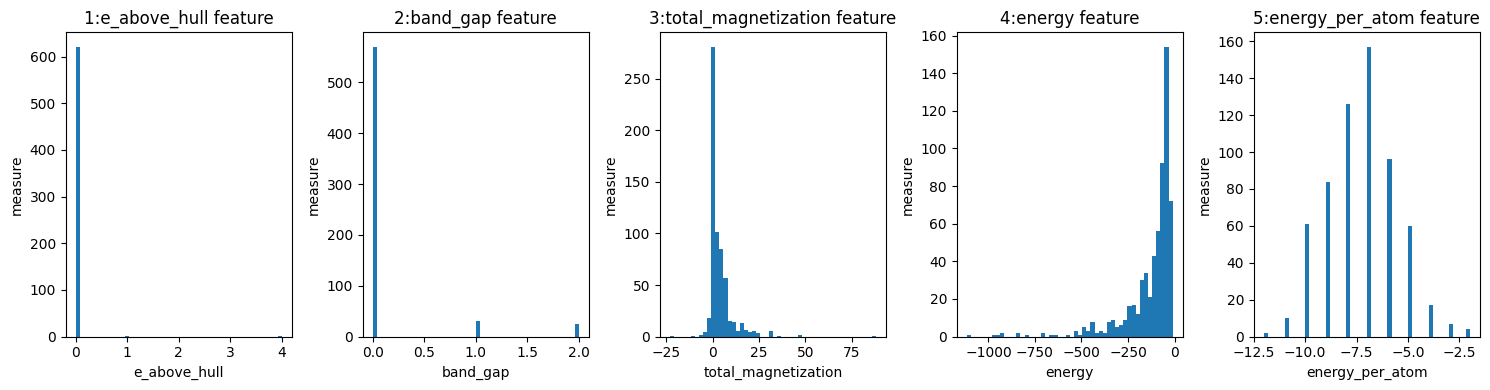

In [22]:
##checking for distribution of each of the features
plt.figure(figsize=(15, 4))
for i, column in enumerate(X.columns,start=1):
    plt.subplot(1,len(X.columns),i)
    plt.hist(X[column], bins=50)
    plt.title(f'{i}:{column} feature')
    plt.xlabel(f'{column}')
    plt.ylabel('measure')

plt.tight_layout()
plt.show()

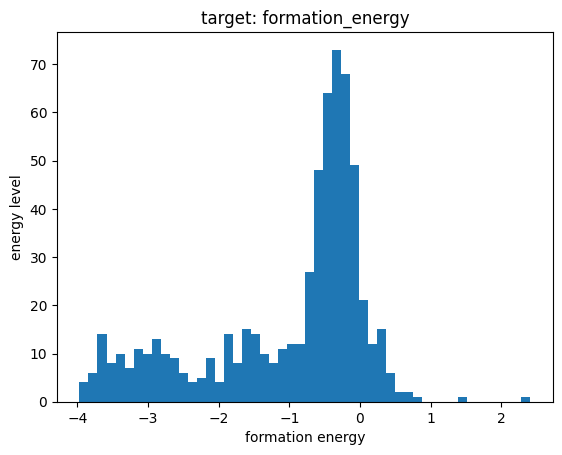

In [23]:
##applying this to target column
plt.hist(y, bins=50);
plt.title('target: formation_energy')
plt.xlabel('formation energy')
plt.ylabel('energy level')
plt.show()

In [24]:
##inspecting correlation between feature variables
cor = X.corr()
cor

,e_above_hull,band_gap,total_magnetization,energy,energy_per_atom
e_above_hull,1.000000,-0.016422,-0.023801,-0.012534,0.115476
band_gap,-0.016422,1.000000,-0.128363,-0.415325,0.089489
total_magnetization,-0.023801,-0.128363,1.000000,-0.324885,0.053869
energy,-0.012534,-0.415325,-0.324885,1.000000,0.046572
energy_per_atom,0.115476,0.089489,0.053869,0.046572,1.000000


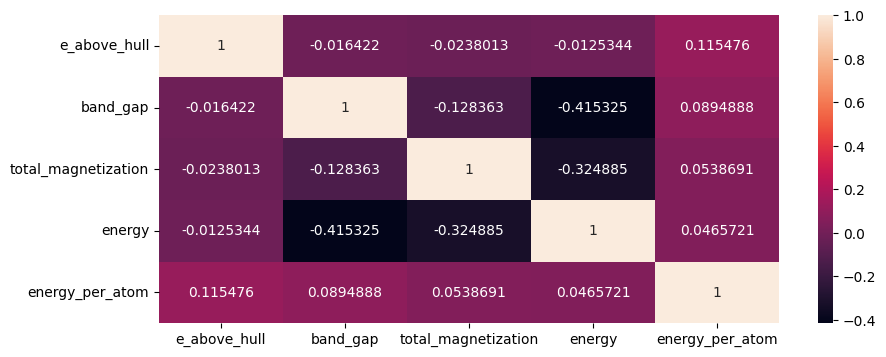

In [25]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(10,4)
sns.heatmap(cor, annot=True,fmt='g');

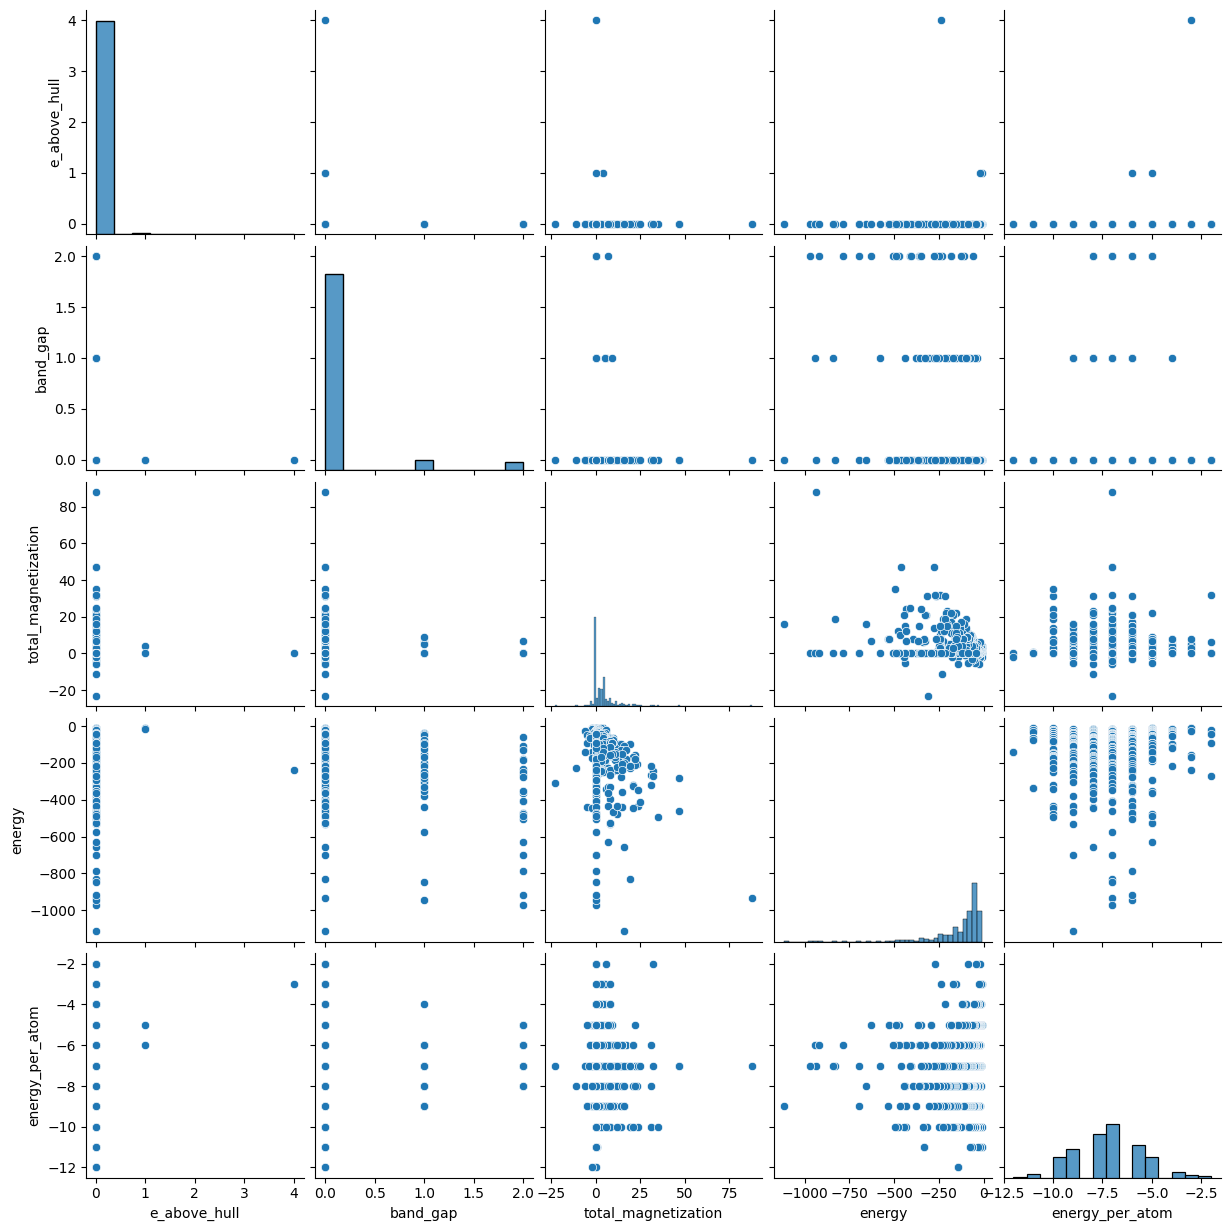

In [26]:
##using a pair plot (scatter) to see the influence of each feature on itself
sns.pairplot(X);

In [27]:
##each feature is barely correlated with the other

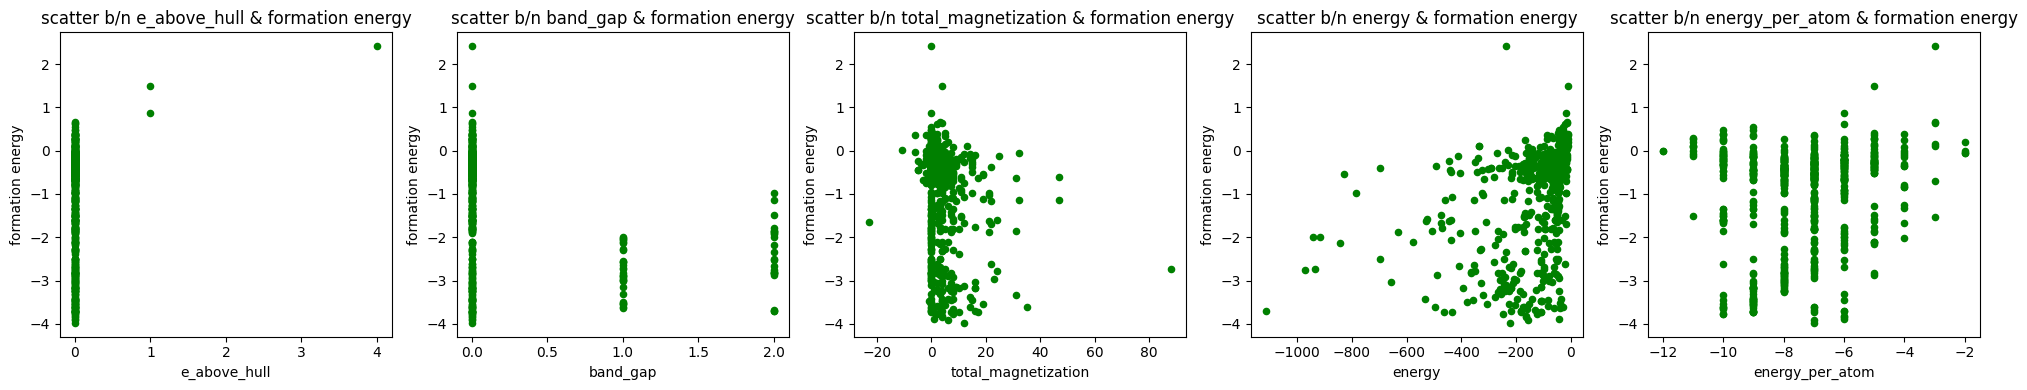

In [28]:
##investigating their effect on the target
plt.figure(figsize=(20,4))

for i, column in enumerate(X.columns,start=1):
    plt.subplot(1,len(X.columns),i)
    plt.scatter(X[column],y,s=20,color='green')
    plt.title(f'scatter b/n {column} & formation energy')
    plt.xlabel(f'{column}')
    plt.ylabel('formation energy')

plt.tight_layout()
plt.show()

In [29]:
##no defined relationship between the features and the target

In [30]:
##scaling data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [31]:
#scaling
feature_names = X.columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = feature_names)

In [32]:
! {sys.executable} -m pip install smogn

In [33]:
##splitting train and test
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y, random_state=0, test_size=0.1)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(561, 5) (561,) (63, 5) (63,)


In [34]:
##running a simple linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
##inspecting training performance
print('mean_squared_error:', mean_squared_error(y_train,lr.predict(X_train)))
print('mean_absolute_error:', mean_absolute_error(y_train,lr.predict(X_train)))

mean_squared_error: 0.9679738350868583
mean_absolute_error: 0.7543531435122095


In [36]:
##testing the performance
print('mean_squared_error:', mean_squared_error(y_test,lr.predict(X_test)))
print('mean_absolute_error:', mean_absolute_error(y_test,lr.predict(X_test)))

mean_squared_error: 0.9500100737561636
mean_absolute_error: 0.7895547131901618


In [37]:
##digging deeper with scipy.stats.api model for further statistical analysis

In [38]:
!{sys.executable} -m pip install statsmodels

In [39]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor #VIF for removes columns with multicollinearity
from sklearn.feature_selection import RFE 
#Recursive Factor Elimination. selects a subset of features through ranking, hence only imprtant features are selected in a ranking system

In [40]:
X_train_ar = np.asarray(X_train)
y_train_ar = np.asarray(y_train)

In [41]:
def build_model(X, y):
    X = sm.add_constant(X) #adding a constant thus beta not or theta not
    lm = sm.OLS(y,X).fit() #creating the linear model with ols and fitting it to the data(x_train, y_train)
    print(lm.summary())
    return lm

def checkVIF(X): #this function will regress all the features against each other and produce some r-squared used to calculate the VIF
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif    

In [42]:
##creating our first linear regression model with model summary
model_1 = build_model(X_train_ar,y_train_ar)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     45.63
Date:                Thu, 04 Sep 2025   Prob (F-statistic):           1.75e-39
Time:                        10:56:17   Log-Likelihood:                -786.89
No. Observations:                 561   AIC:                             1586.
Df Residuals:                     555   BIC:                             1612.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0273      0.042    -24.592      0.0

In [43]:
##ols model suggests that all features play a crucial role in predicting the formation_energy
##this is because p>|t| is less than 0.05 for all features and very low R-squared and Adj R-squared

In [44]:
#checking feature importance with the variance inflation factor (VIF)
checkVIF(X_train)

,Features,VIF
3,energy,1.48
1,band_gap,1.34
2,total_magnetization,1.27
4,energy_per_atom,1.05
0,e_above_hull,1.02


In [45]:
##from the VIF, we can see a ranking of the most important features to the less important

In [46]:
##the model adds a constant term for the linear regression so I will add
##it to the train data before prediction
X_train_ar_const = sm.add_constant(X_train_ar)
X_train_ar_const.shape

(561, 6)

In [47]:
##using the model to predict the train data and compare
y_train_pred = model_1.predict(X_train_ar_const)

In [48]:
y_train_pred.shape

(561,)

In [49]:
y_train_pred

array([-1.61324586e+00, -2.62513106e+00, -2.17046259e+00, -6.15530314e-01,
       -6.37707814e-01, -8.31734331e-01, -1.19164726e+00, -7.88540797e-01,
       -1.09981783e+00, -7.38863597e-01, -8.02152028e-01, -5.00643299e-01,
       -7.11843247e-01, -7.16727479e-01, -3.24827282e+00, -1.09893774e+00,
       -1.28160279e-01, -9.75963974e-01, -8.21205623e-01, -9.92976349e-01,
       -4.23545018e-01, -1.54891612e+00, -5.14853881e-01, -1.09961571e+00,
       -1.21766769e+00, -9.46700128e-01, -6.83422083e-01, -9.12795381e-01,
       -9.78245034e-01, -7.06479665e-01,  3.53280663e-01, -9.26526613e-01,
       -8.58915901e-01, -1.24801056e+00, -8.35697099e-01, -9.50344438e-01,
       -1.06010755e+00, -6.38187164e-01, -1.15570162e+00, -9.99261231e-01,
       -3.98805728e-01, -2.64138286e+00, -9.26005880e-01, -9.80687150e-01,
       -6.73174269e-01, -7.90623237e-01, -3.72946517e-01, -3.43768928e-01,
       -6.35625211e-01, -8.71324774e-01, -6.43430909e-01, -1.41749625e+00,
       -8.16482447e-01, -

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30564\2809835444.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-y_train_pred), bins=20)


Text(0.5, 0, 'Errors')

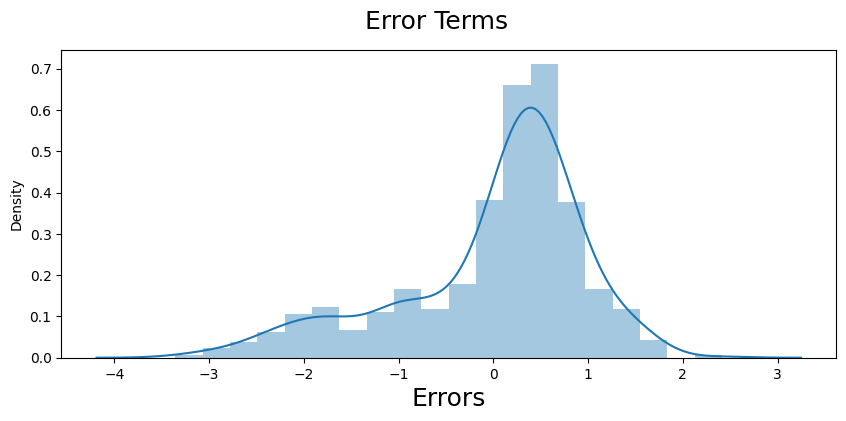

In [50]:
##plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train-y_train_pred), bins=20)
fig.suptitle('Error Terms', fontsize=18)
plt.xlabel('Errors', fontsize=18)

In [51]:
##we see that the error terms are mostly centered around 0 with a few outliers
##the error terms are also normall distributed which satisfies the linear regression OLS assumption

In [52]:
##checking the mean_squared_error for the model_1
print('mean_squared_error:', mean_squared_error(y_train,y_train_pred))
print('mean_absolute_error:', mean_absolute_error(y_train,y_train_pred))

mean_squared_error: 0.9679738350868585
mean_absolute_error: 0.7543531435122098


In [53]:
X_test = pd.DataFrame(X_test)
X_test = np.array(X_test)
X_test.shape

(63, 5)

In [57]:
X_test = np.asarray(X_test)
type(X_test)

numpy.ndarray

In [58]:
##predicting on the test data
X_test_const1 = sm.add_constant(X_test)
X_test_const1.shape

(63, 5)

In [55]:
y_test_pred = model_1.predict(X_test_const1)
y_test_pred.shape

ValueError: shapes (63,5) and (6,) not aligned: 5 (dim 1) != 6 (dim 0)

In [ ]:
y_test_pred

In [ ]:
##plot the histogram of the error terms
fig = plt.figure()
sns.histplot((y_test-y_test_pred), bins=20);
fig.suptitle('Error Terms', fontsize=18);
plt.xlabel('Errors', fontsize=18);                      
plt.show()

In [ ]:
print('mean_squared_error:', mean_squared_error(y_test,y_test_pred))
print('mean_absolute_error:', mean_absolute_error(y_test,y_test_pred))

In [ ]:
from sklearn.metrics import r2_score
print('Test Prediction R-sqrd: ', round(r2_score(y_test,y_test_pred),3))
print('Train Prediction R-sqrd: ', round(r2_score(y_train,y_train_pred),3))

In [ ]:
##EVALUATION OF THE MODEL
#plotting y_test, y_pred as a scatter to check for linearity
plt.figure()
plt.scatter(y_test, y_test_pred)
plt.suptitle('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

In [ ]:
##there is not supposed to be any relationship(linearity) between the predicted values and the actual
##if there is, it shows some leakage in data.

In [ ]:
##residual normality
residt = model_1.resid
residt

In [ ]:
## residual normality
probplot = sm.ProbPlot(residt)
plt.figure(figsize=(8,6))
probplot.ppplot(line='45')
plt.title('Normal P-P PLot for Regression Standardized Residuals')
plt.show()

In [ ]:
##the linear regression model expects that residuals are normally distributed but the PP plot shows that the assumption
##is not fully met.

In [ ]:
###test of homoscedasticity
def get_standard_values(parm):
    return (parm - parm.mean())/parm.std()

plt.scatter(get_standard_values(model_1.fittedvalues), get_standard_values(residt))
plt.title('Residual Analysis-Noises')
plt.xlabel('Standardized Predicted Values')
plt.ylabel('Standardized Residuals')

In [ ]:
##as clearly seen, there is no relationship between the residuals(error terms) and the predicted values
##as such the model is said to be homoscedasctic which implies that there is a constant variance amongst the error terms

In [ ]:
residuals = y_test - model_1.predict(X_test_const)
print("Mean of residuals:", residuals.mean())

## MLP for Linear Regression

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
##model creation
model_2 = MLPRegressor()
help(model_2)